# Upload Dataset 

In [1]:
file_path = "/kaggle/input/dataset-eksperimen-tfidf/data_eksperimen - data_eksperimen.csv"

In [2]:
import pandas as pd
df = pd.read_csv(file_path, encoding='ISO-8859-1') #default encoding Windows indonesianya kalau ga gini nanti defaultnya mmebaca UTF8
df.shape

(100, 5)

In [3]:
df.head()

,Tanggal,Judul,Editor,Tema,Konten
0,2023-12-05,Ekonomi Digital Sumber Pertumbuhan Ekonomi Bar...,admin,artificial intelligence,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,..."
1,2024-10-06,Guru Milenial Harus Cakap Digital,"Effran, Ihwana Haulan",artificial intelligence,"Pemimpin Perusahaan Lampung Post, Iskandar Zul..."
2,2024-06-05,"Membanggakan, Dosen Teknokrat Dinobatkan Sebag...","Nur, Delima Napitupulu",artificial intelligence,Dosen sekaligus wakil dekan bidang akademik Fa...
3,2024-06-08,KPDI Dorong Pengelolaan Perpustakaan Menggunak...,Nur,artificial intelligence,Konferensi perpustakaan digital indonesia 2024...
4,2024-10-12,"Cara Mengaktifkan Meta AI di WhatsApp, Pengala...",Denny ZY,artificial intelligence,Bandar Lampung menghadirkan inovasi untuk meni...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  100 non-null    object
 1   Judul    100 non-null    object
 2   Editor   100 non-null    object
 3   Tema     100 non-null    object
 4   Konten   100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [5]:
df = df[df['Konten'].notnull()] #cek di kolom konten yang tidak null
df=df.dropna(how='any') #kalau ada SATU kolom saja kosong langsung hapusin

In [6]:
#karena difokuskan pada kolom text berita, drop terlebih dahulu kolom lain dulu
df = df.drop('Tanggal', axis=1)
df = df.drop('Editor', axis=1)
df = df.drop('Tema', axis=1)

# Preprocessing Text (Data Cleaning)

### Case Folding

In [7]:
import re
import string
import numpy as np
def preprocess_text(kalimat):
    text = kalimat.lower()  #Mengonversi ke huruf kecil
    text = re.sub(r'\d+', '', text)  #Menghapus angka
    text = re.sub(r'\n', ' ', text)  #Menghapus karakter newline
    text = re.sub(r'\.{2,}', '', text)  #Menghapus titik berlebih
    text = re.sub(r'[^\w\s]', ' ', text) #Menghapus karakter khusus tetapi menambahkan spasi di kedua sisi sebelum menghapus
    text = text.translate(str.maketrans("", "", string.punctuation)) #Menghapus tanda baca
    text = re.sub(r'\s+', ' ', text)     #Menghapus spasi berlebih
    text = text.strip()  #Menghapus spasi pada awal dan akhir kalimat
    return text

In [8]:
df['text_bersih'] = df['Konten'].apply(preprocess_text)
df.head()

,Judul,Konten,text_bersih
0,Ekonomi Digital Sumber Pertumbuhan Ekonomi Bar...,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,...",bandar lampung mendukung kegiatan ktt asean ka...
1,Guru Milenial Harus Cakap Digital,"Pemimpin Perusahaan Lampung Post, Iskandar Zul...",pemimpin perusahaan lampung post iskandar zulk...
2,"Membanggakan, Dosen Teknokrat Dinobatkan Sebag...",Dosen sekaligus wakil dekan bidang akademik Fa...,dosen sekaligus wakil dekan bidang akademik fa...
3,KPDI Dorong Pengelolaan Perpustakaan Menggunak...,Konferensi perpustakaan digital indonesia 2024...,konferensi perpustakaan digital indonesia lamp...
4,"Cara Mengaktifkan Meta AI di WhatsApp, Pengala...",Bandar Lampung menghadirkan inovasi untuk meni...,bandar lampung menghadirkan inovasi untuk meni...


In [9]:
total_char_before = df['Konten'].str.len().sum()
total_char_after = df['text_bersih'].str.len().sum()


total_word_before = df['Konten'].str.split().str.len().sum()
total_word_after = df['text_bersih'].str.split().str.len().sum()

print("Total Karakter Sebelum Preprocessing:", total_char_before)
print("Total Karakter Setelah Preprocessing:", total_char_after)
print("Total Kata Sebelum Preprocessing:", total_word_before)
print("Total Kata Setelah Preprocessing:", total_word_after)

Total Karakter Sebelum Preprocessing: 285805
Total Karakter Setelah Preprocessing: 274201
Total Kata Sebelum Preprocessing: 38418
Total Kata Setelah Preprocessing: 38180


### Tokenizing

In [10]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
df['token'] = df['text_bersih'].apply(word_tokenize)
df.head()

,Judul,Konten,text_bersih,token
0,Ekonomi Digital Sumber Pertumbuhan Ekonomi Bar...,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,...",bandar lampung mendukung kegiatan ktt asean ka...,"[bandar, lampung, mendukung, kegiatan, ktt, as..."
1,Guru Milenial Harus Cakap Digital,"Pemimpin Perusahaan Lampung Post, Iskandar Zul...",pemimpin perusahaan lampung post iskandar zulk...,"[pemimpin, perusahaan, lampung, post, iskandar..."
2,"Membanggakan, Dosen Teknokrat Dinobatkan Sebag...",Dosen sekaligus wakil dekan bidang akademik Fa...,dosen sekaligus wakil dekan bidang akademik fa...,"[dosen, sekaligus, wakil, dekan, bidang, akade..."
3,KPDI Dorong Pengelolaan Perpustakaan Menggunak...,Konferensi perpustakaan digital indonesia 2024...,konferensi perpustakaan digital indonesia lamp...,"[konferensi, perpustakaan, digital, indonesia,..."
4,"Cara Mengaktifkan Meta AI di WhatsApp, Pengala...",Bandar Lampung menghadirkan inovasi untuk meni...,bandar lampung menghadirkan inovasi untuk meni...,"[bandar, lampung, menghadirkan, inovasi, untuk..."


In [12]:
total_char_before = df['text_bersih'].str.len().sum()
total_char_after = df['token'].apply(lambda x: sum(len(kata) for kata in x))

total_word_before = df['text_bersih'].str.split().str.len().sum()
total_word_after = df['token'].apply(len).sum()

print("Total Karakter Sebelum Preprocessing:", total_char_before)
print("Total Karakter Setelah Preprocessing:", total_char_after)
print("Total Kata Sebelum Tokenizing:", total_word_before)
print("Total Kata Setelah Tokenizing:", total_word_after)

Total Karakter Sebelum Preprocessing: 274201
Total Karakter Setelah Preprocessing: 0     4855
1     1666
2     1821
3     2067
4     2736
      ... 
95    1150
96    1114
97    1189
98    1132
99    2946
Name: token, Length: 100, dtype: int64
Total Kata Sebelum Tokenizing: 38180
Total Kata Setelah Tokenizing: 38180


### Stopword

In [13]:
pip install Sastrawi #download yang dibutuhkan dulu untuk pembersihan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["Ã¢", "co", "yg", "rt", "dgn", "ny", "i", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', "ri",
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

list_stopwords = set(list_stopwords)
def stopwords_removal(words): #kita mulai hapusin
    return [word for word in words if word not in list_stopwords]

#Mengaplikasikan
df['stop'] = df['token'].apply(stopwords_removal)

In [16]:
df.head()

,Judul,Konten,text_bersih,token,stop
0,Ekonomi Digital Sumber Pertumbuhan Ekonomi Bar...,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,...",bandar lampung mendukung kegiatan ktt asean ka...,"[bandar, lampung, mendukung, kegiatan, ktt, as...","[bandar, lampung, mendukung, kegiatan, ktt, as..."
1,Guru Milenial Harus Cakap Digital,"Pemimpin Perusahaan Lampung Post, Iskandar Zul...",pemimpin perusahaan lampung post iskandar zulk...,"[pemimpin, perusahaan, lampung, post, iskandar...","[pemimpin, perusahaan, lampung, post, iskandar..."
2,"Membanggakan, Dosen Teknokrat Dinobatkan Sebag...",Dosen sekaligus wakil dekan bidang akademik Fa...,dosen sekaligus wakil dekan bidang akademik fa...,"[dosen, sekaligus, wakil, dekan, bidang, akade...","[dosen, wakil, dekan, bidang, akademik, fakult..."
3,KPDI Dorong Pengelolaan Perpustakaan Menggunak...,Konferensi perpustakaan digital indonesia 2024...,konferensi perpustakaan digital indonesia lamp...,"[konferensi, perpustakaan, digital, indonesia,...","[konferensi, perpustakaan, digital, indonesia,..."
4,"Cara Mengaktifkan Meta AI di WhatsApp, Pengala...",Bandar Lampung menghadirkan inovasi untuk meni...,bandar lampung menghadirkan inovasi untuk meni...,"[bandar, lampung, menghadirkan, inovasi, untuk...","[bandar, lampung, menghadirkan, inovasi, menin..."


In [17]:
total_char_before = df['token'].apply(lambda x: sum(len(kata) for kata in x))
total_char_after = df['stop'].apply(lambda x: sum(len(kata) for kata in x))

total_word_before = df['token'].apply(len).sum()
total_word_after = df['stop'].apply(len).sum()

print("Total Karakter Sebelum Preprocessing:", total_char_before)
print("Total Karakter Setelah Preprocessing:", total_char_after)
print("Total Kata Sebelum Stopword:", total_word_before)
print("Total Kata Setelah Stopword:", total_word_after)

Total Karakter Sebelum Preprocessing: 0     4855
1     1666
2     1821
3     2067
4     2736
      ... 
95    1150
96    1114
97    1189
98    1132
99    2946
Name: token, Length: 100, dtype: int64
Total Karakter Setelah Preprocessing: 0     3710
1     1178
2     1431
3     1527
4     1770
      ... 
95     819
96     819
97     849
98     833
99    2006
Name: stop, Length: 100, dtype: int64
Total Kata Sebelum Stopword: 38180
Total Kata Setelah Stopword: 23456


### Stemming

In [18]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=c722ffe11efe4ea52b22fbcd0c4e563103f1e1a1b27719db327da44e2ad18102
  Stored in directory: /root/.cache/pip/wheels/d9/31/ff/ff51141a088571a9f672449e5aad5ea8bb35ca5d95ba135f30
Successfully built swifter


In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# buat stemmernya
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in df['stop']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stem'] = df['stop'].swifter.apply(get_stemmed_term)

4665
bandar : bandar
lampung : lampung
mendukung : dukung
kegiatan : giat
ktt : ktt
asean : asean
kantor : kantor
perwakilan : wakil
bank : bank
indonesia : indonesia
provinsi : provinsi
gelar : gelar
capacity : capacity
building : building
on : on
issues : issues
auditorium : auditorium
jumat : jumat
mei : mei
salah : salah
bahasannya : bahas
ekonomi : ekonomi
digital : digital
acara : acara
menghadirkan : hadir
yoga : yoga
affandi : affandi
kepala : kepala
institute : institute
keynote : keynote
speaker : speaker
narasumber : narasumber
djamin : djamin
edison : edison
nainggolan : nainggolan
direktur : direktur
eksekutif : eksekutif
asosiasi : asosiasi
sistem : sistem
pembayaran : bayar
aspi : aspi
imam : imam
awaluddin : awaluddin
peneliti : teliti
ikatan : ikat
sarjana : sarjana
cabang : cabang
moderator : moderator
irfan : irfan
farulian : farulian
deputi : deputi
mengusung : usung
tema : tema
matters : matters
epicentrum : epicentrum
of : of
growth : growth
diikuti : ikut
stakeho

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

In [20]:
df1 = df[['Konten', 'stem']]
df1.head(5)

,Konten,stem
0,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,...","[bandar, lampung, dukung, giat, ktt, asean, ka..."
1,"Pemimpin Perusahaan Lampung Post, Iskandar Zul...","[pimpin, usaha, lampung, post, iskandar, zulka..."
2,Dosen sekaligus wakil dekan bidang akademik Fa...,"[dosen, wakil, dekan, bidang, akademik, fakult..."
3,Konferensi perpustakaan digital indonesia 2024...,"[konferensi, pustaka, digital, indonesia, lamp..."
4,Bandar Lampung menghadirkan inovasi untuk meni...,"[bandar, lampung, hadir, inovasi, tingkat, ala..."


In [21]:
total_char_before = df['stop'].apply(lambda x: sum(len(kata) for kata in x))
total_char_after = df1['stem'].apply(lambda x: sum(len(kata) for kata in x))

total_word_before = df['stop'].apply(len).sum()
total_word_after = df1['stem'].apply(len).sum()

print("Total Karakter Sebelum Preprocessing:", total_char_before)
print("Total Karakter Setelah Preprocessing:", total_char_after)
print("Total Kata Sebelum Stemming:", total_word_before)
print("Total Kata Setelah Stemming:", total_word_after)

Total Karakter Sebelum Preprocessing: 0     3710
1     1178
2     1431
3     1527
4     1770
      ... 
95     819
96     819
97     849
98     833
99    2006
Name: stop, Length: 100, dtype: int64
Total Karakter Setelah Preprocessing: 0     3173
1      995
2     1258
3     1278
4     1391
      ... 
95     707
96     701
97     731
98     718
99    1579
Name: stem, Length: 100, dtype: int64
Total Kata Sebelum Stemming: 23456
Total Kata Setelah Stemming: 23456


### Visualisasi Frekuensi Jumlah Kata

In [22]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [23]:
all_tokens = [token for sublist in df1['stem'] for token in sublist]
freq_list = FreqDist(all_tokens)
print(freq_list.most_common())

[('', 437), ('lampung', 358), ('indonesia', 304), ('ekonomi', 208), ('usaha', 191), ('tingkat', 187), ('pasar', 185), ('masyarakat', 158), ('harga', 154), ('rp', 151), ('ai', 140), ('modal', 136), ('uang', 135), ('digital', 132), ('milik', 132), ('kembang', 125), ('investasi', 125), ('emas', 120), ('bandar', 109), ('layan', 106), ('pinjam', 106), ('investor', 103), ('teknologi', 100), ('tumbuh', 97), ('fintech', 94), ('ojk', 93), ('guna', 88), ('sektor', 88), ('kerja', 82), ('laku', 81), ('umkm', 79), ('salah', 78), ('dukung', 77), ('perintah', 75), ('provinsi', 70), ('capai', 69), ('kota', 68), ('data', 66), ('persen', 65), ('jalan', 62), ('tantang', 61), ('juta', 61), ('hasil', 61), ('nilai', 60), ('biaya', 60), ('orang', 60), ('hadir', 59), ('program', 59), ('giat', 58), ('fitur', 57), ('syariah', 57), ('online', 57), ('dagang', 56), ('mudah', 56), ('manfaat', 56), ('global', 56), ('daya', 55), ('butuh', 55), ('jasa', 55), ('cepat', 54), ('negara', 54), ('dunia', 53), ('jual', 53), 

In [24]:
#menghapus tanda spasi yang juga ikut dihitung
df1['stem'] = df1['stem'].apply(lambda x: [word.strip() for word in x if word.strip() != ''])

/tmp/ipykernel_55/3067711001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stem'] = df1['stem'].apply(lambda x: [word.strip() for word in x if word.strip() != ''])


In [25]:
#nampilin semua perhitungan token kata
all_tokens = [token for sublist in df1['stem'] for token in sublist if token.strip()]
freq_list = FreqDist(all_tokens)
print(freq_list.most_common())

[('lampung', 358), ('indonesia', 304), ('ekonomi', 208), ('usaha', 191), ('tingkat', 187), ('pasar', 185), ('masyarakat', 158), ('harga', 154), ('rp', 151), ('ai', 140), ('modal', 136), ('uang', 135), ('digital', 132), ('milik', 132), ('kembang', 125), ('investasi', 125), ('emas', 120), ('bandar', 109), ('layan', 106), ('pinjam', 106), ('investor', 103), ('teknologi', 100), ('tumbuh', 97), ('fintech', 94), ('ojk', 93), ('guna', 88), ('sektor', 88), ('kerja', 82), ('laku', 81), ('umkm', 79), ('salah', 78), ('dukung', 77), ('perintah', 75), ('provinsi', 70), ('capai', 69), ('kota', 68), ('data', 66), ('persen', 65), ('jalan', 62), ('tantang', 61), ('juta', 61), ('hasil', 61), ('nilai', 60), ('biaya', 60), ('orang', 60), ('hadir', 59), ('program', 59), ('giat', 58), ('fitur', 57), ('syariah', 57), ('online', 57), ('dagang', 56), ('mudah', 56), ('manfaat', 56), ('global', 56), ('daya', 55), ('butuh', 55), ('jasa', 55), ('cepat', 54), ('negara', 54), ('dunia', 53), ('jual', 53), ('aplikasi'

<function matplotlib.pyplot.show(close=None, block=None)>

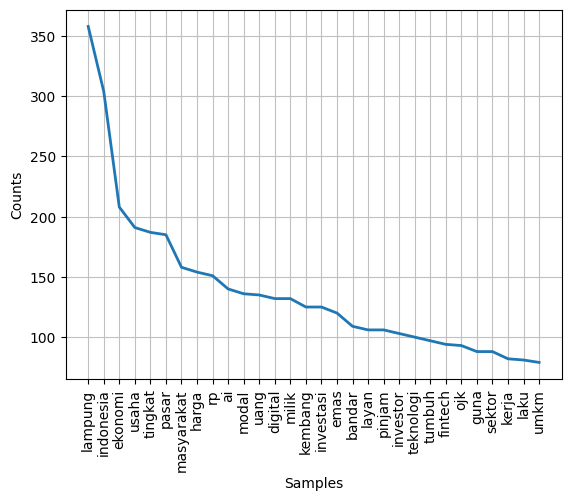

In [26]:
freq_list.plot(30,cumulative=False)
plt.show

In [28]:
df1['stem_text'] = df1['stem'].apply(' '.join)

/tmp/ipykernel_55/3263325546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stem_text'] = df1['stem'].apply(' '.join)


In [29]:
df1.head(5)

,Konten,stem,stem_text
0,"Bandar Lampung - Mendukung kegiatan KTT ASEAN,...","[bandar, lampung, dukung, giat, ktt, asean, ka...",bandar lampung dukung giat ktt asean kantor wa...
1,"Pemimpin Perusahaan Lampung Post, Iskandar Zul...","[pimpin, usaha, lampung, post, iskandar, zulka...",pimpin usaha lampung post iskandar zulkarnain ...
2,Dosen sekaligus wakil dekan bidang akademik Fa...,"[dosen, wakil, dekan, bidang, akademik, fakult...",dosen wakil dekan bidang akademik fakultas tek...
3,Konferensi perpustakaan digital indonesia 2024...,"[konferensi, pustaka, digital, indonesia, lamp...",konferensi pustaka digital indonesia lampost n...
4,Bandar Lampung menghadirkan inovasi untuk meni...,"[bandar, lampung, hadir, inovasi, tingkat, ala...",bandar lampung hadir inovasi tingkat alam guna...


## TF IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df1['stem_text'].values)
tfidf.shape

(100, 3392)

In [31]:
tfidf_dense = tfidf.toarray()

### PCA 90%

In [33]:
from sklearn.decomposition import PCA
pca = PCA().fit(tfidf_dense)

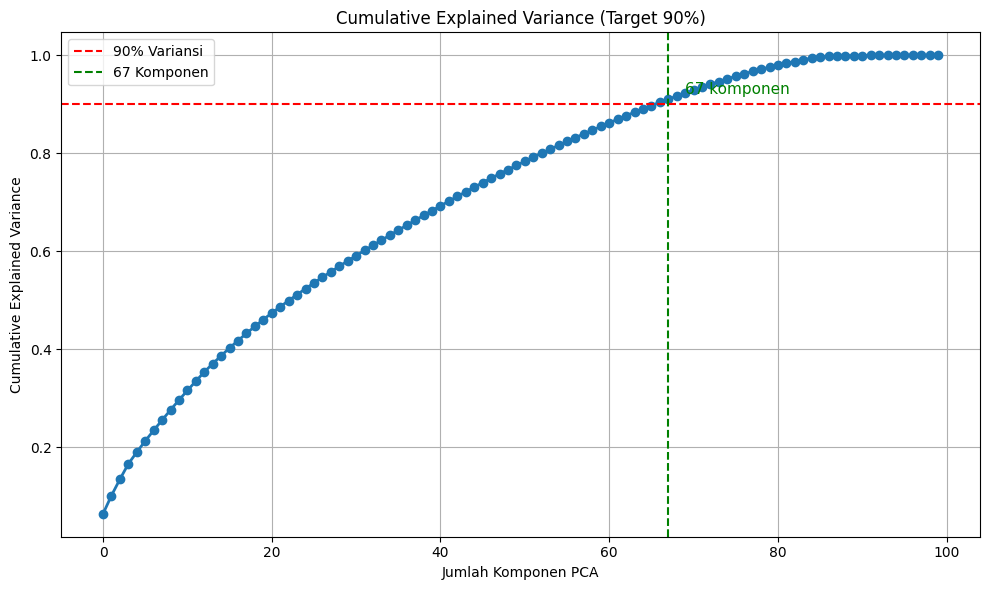

In [34]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
target = 0.90
n_components_90 = np.argmax(cumulative_variance >= target) + 1
variance_90 = cumulative_variance[n_components_90 - 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linewidth=2)
plt.axhline(y=target, color='red', linestyle='--', label=f'{int(target*100)}% Variansi')
plt.axvline(x=n_components_90, color='green', linestyle='--', label=f'{n_components_90} Komponen')
plt.text(n_components_90 + 2, target + 0.02, f"{n_components_90} komponen", color='green', fontsize=11)

plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Cumulative Explained Variance")
plt.title(f"Cumulative Explained Variance (Target {int(target*100)}%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

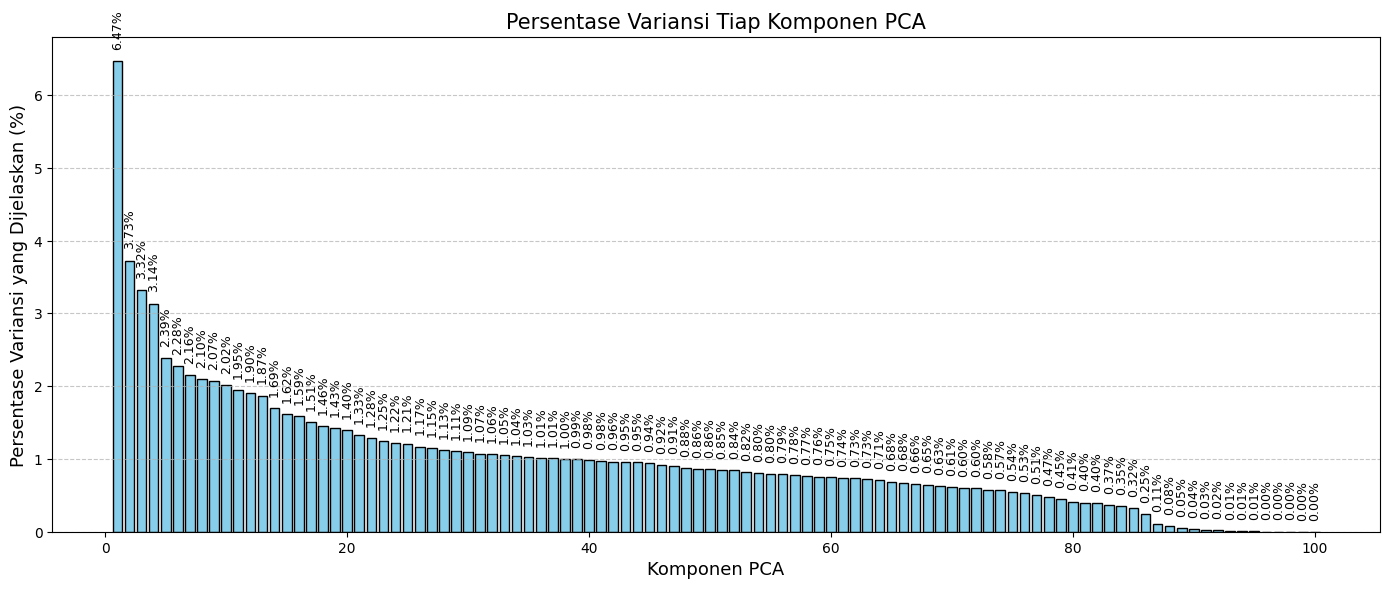

In [35]:
# Grafik batang: kontribusi masing-masing komponen PCA
plt.figure(figsize=(14, 6))
components = np.arange(1, len(pca.explained_variance_ratio_) + 1)
variance_ratio = pca.explained_variance_ratio_ * 100  # ubah ke persen

bars = plt.bar(components, variance_ratio, color='skyblue', edgecolor='black')

# Tampilkan persentase di atas batang
for i, v in enumerate(variance_ratio):
    plt.text(i + 1, v + 0.2, f"{v:.2f}%", ha='center', fontsize=9, rotation=90)

plt.xlabel("Komponen PCA", fontsize=13)
plt.ylabel("Persentase Variansi yang Dijelaskan (%)", fontsize=13)
plt.title("Persentase Variansi Tiap Komponen PCA", fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
n_components = 67
explained_var_top_n = np.sum(pca.explained_variance_ratio_[:n_components]) * 100

print(f"{n_components} komponen menjelaskan {explained_var_top_n:.2f}% dari seluruh variansi data.")

67 komponen menjelaskan 90.40% dari seluruh variansi data.


In [37]:
pca = PCA(n_components=67, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_dense)

cosine similarity

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

#cosine similarity nya antara semua dokumen
cosine_sim = cosine_similarity(tfidf_reduced)

#hasil dalam bentuk matriks
import pandas as pd
df_similarity = pd.DataFrame(cosine_sim)

print(df_similarity.head())  #menampilkan 5 dokumen pertama dulu

         0         1         2         3         4         5         6   \
0  1.000000 -0.009456  0.002702  0.043550 -0.063214 -0.062342 -0.010350   
1 -0.009456  1.000000  0.079043  0.129029  0.073296 -0.015137  0.059584   
2  0.002702  0.079043  1.000000  0.117295  0.004015 -0.000521 -0.007312   
3  0.043550  0.129029  0.117295  1.000000  0.024126  0.003279  0.031748   
4 -0.063214  0.073296  0.004015  0.024126  1.000000  0.155382  0.178282   

         7         8         9   ...        90        91        92        93  \
0  0.010861 -0.019337 -0.044929  ... -0.028141 -0.028118 -0.054759 -0.059829   
1 -0.008382  0.036099  0.033845  ... -0.011915 -0.016248 -0.042532 -0.022432   
2 -0.010888 -0.002027 -0.028083  ...  0.006814 -0.003270 -0.008392 -0.004590   
3 -0.016858  0.039716  0.034586  ... -0.005869 -0.023121 -0.019498 -0.046014   
4  0.007664  0.106879  0.200777  ... -0.018227 -0.008791 -0.006383 -0.034662   

         94        95        96        97        98        99  
0 -0

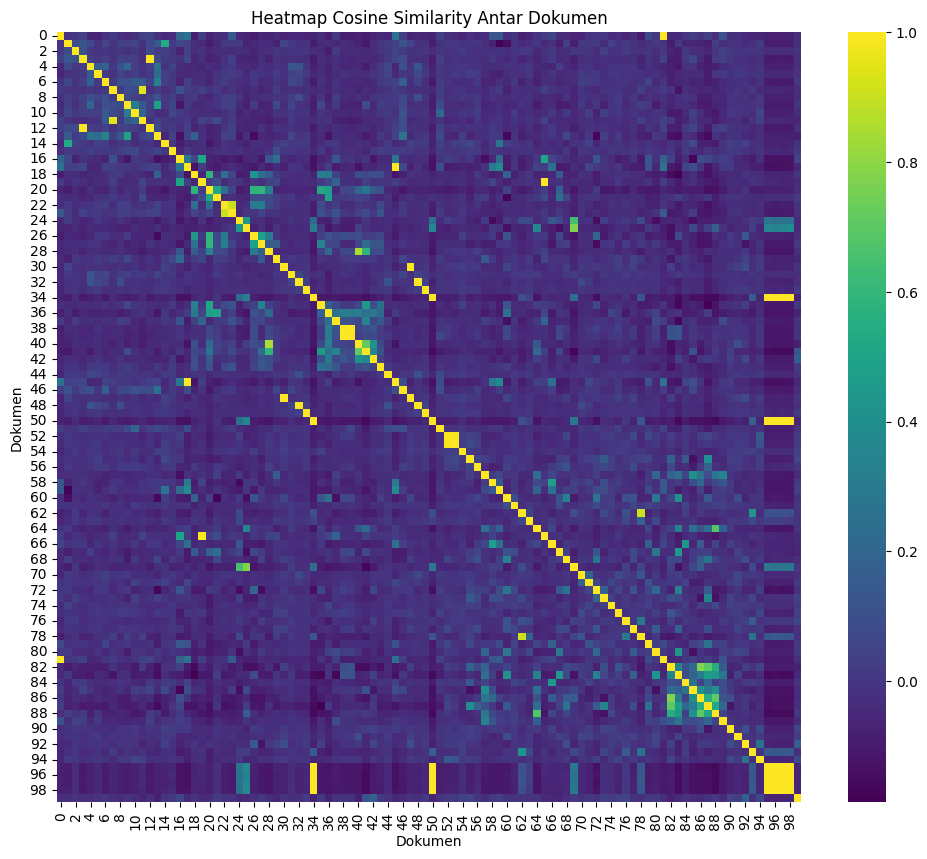

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Ukuran heatmap (bisa disesuaikan)
sns.heatmap(df_similarity, cmap='viridis')  # Atau cmap lain: 'coolwarm', 'plasma', dll
plt.title("Heatmap Cosine Similarity Antar Dokumen")
plt.xlabel("Dokumen")
plt.ylabel("Dokumen")
plt.show()

### cosine distance 

In [40]:
# mengubah Cosine Similarity menjadi Cosine Distance
cosine_dist = 1 - cosine_sim  # Sesuai dengan rumus pada kutipan jurnal
cosine_dist = np.maximum(cosine_dist, 0)

In [41]:
# Pastikan doc_names sudah ada
doc_names = [f"Doc_{i+1}" for i in range(tfidf_reduced.shape[0])]

# Langsung konversi cosine_dist ke DataFrame
df_cosine_dist = pd.DataFrame(cosine_dist, index=doc_names, columns=doc_names)

# Simpan ke CSV
df_cosine_dist.to_csv("cosine_distancetfidf.csv", index=True)

# Cetak sebagian hasil
print(df_cosine_dist.head())

              Doc_1         Doc_2     Doc_3         Doc_4     Doc_5     Doc_6  \
Doc_1  2.220446e-16  1.009456e+00  0.997298  9.564503e-01  1.063214  1.062342   
Doc_2  1.009456e+00  3.330669e-16  0.920957  8.709711e-01  0.926704  1.015137   
Doc_3  9.972982e-01  9.209565e-01  0.000000  8.827050e-01  0.995985  1.000521   
Doc_4  9.564503e-01  8.709711e-01  0.882705  2.220446e-16  0.975874  0.996721   
Doc_5  1.063214e+00  9.267044e-01  0.995985  9.758738e-01  0.000000  0.844618   

          Doc_7     Doc_8     Doc_9    Doc_10  ...    Doc_91    Doc_92  \
Doc_1  1.010350  0.989139  1.019337  1.044929  ...  1.028141  1.028118   
Doc_2  0.940416  1.008382  0.963901  0.966155  ...  1.011915  1.016248   
Doc_3  1.007312  1.010888  1.002027  1.028083  ...  0.993186  1.003270   
Doc_4  0.968252  1.016858  0.960284  0.965414  ...  1.005869  1.023121   
Doc_5  0.821718  0.992336  0.893121  0.799223  ...  1.018227  1.008791   

         Doc_93    Doc_94    Doc_95    Doc_96    Doc_97    Doc_98   

### K distance 

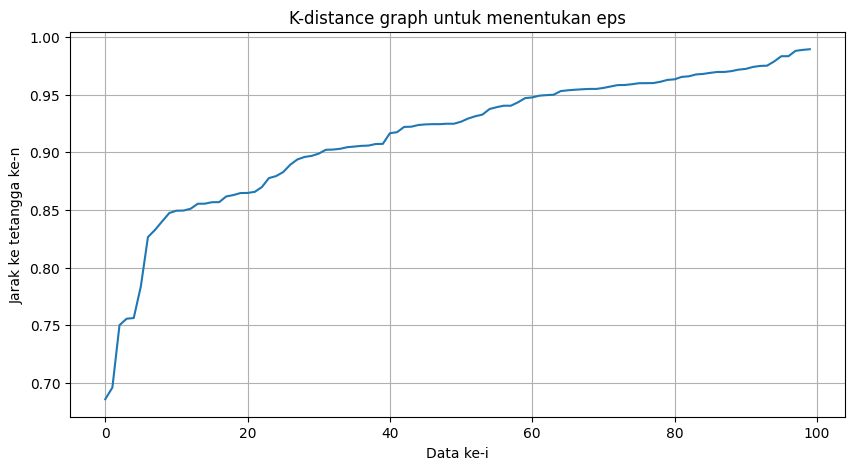

In [42]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10, metric='cosine')
neighbors_fit = neighbors.fit(tfidf_reduced)  # atau doc2vec_vectors
distances, indices = neighbors_fit.kneighbors(tfidf_reduced)  # atau doc2vec_vectors

# Ambil jarak ke tetangga ke-10 (yang paling jauh dari tiap baris)
k_distances = np.sort(distances[:, -1])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title("K-distance graph untuk menentukan eps")
plt.xlabel("Data ke-i")
plt.ylabel("Jarak ke tetangga ke-n")
plt.grid()
plt.show()

## DBSCAN 

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [1]:
#DBSCAN dengan variasi eps dan min_samples
best_eps = None
best_min_samples = None
best_silhouette = -1
results = []
eps_range = np.arange(0.4, 0.85, 0.1)  #range buat nlai epsilonnya
min_samples_range = range(5, 22)  #range buat min sampelnya

for eps_value in eps_range:
    for min_samples_value in min_samples_range:
        dbscan = DBSCAN(metric="precomputed", eps=eps_value, min_samples=min_samples_value)
        labels = dbscan.fit_predict(cosine_dist)

        # Menghitung jumlah cluster unik (tanpa outlier -1)
        unique_clusters = set(labels) - {-1}

        # Mengecek apakah lebih dari 1 cluster untuk menghitung silhouette
        if len(unique_clusters) > 1:
            silhouette_avg = silhouette_score(cosine_dist, labels, metric="precomputed")

            results.append((eps_value, min_samples_value, silhouette_avg, len(unique_clusters)))

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps_value
                best_min_samples = min_samples_value

print(f"Parameter terbaik: eps = {best_eps}, min_samples = {best_min_samples}")
print(f"Silhouette Score terbaik: {best_silhouette}")

NameError: name 'np' is not defined

In [45]:
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)[:100]

print("\n5 Parameter DBSCAN Terbaik:")
for i, (eps, min_samp, silh, clusters) in enumerate(results_sorted, 1):
    print(f"{i}. eps={eps}, min_samples={min_samp}, Silhouette={silh:.7f}, Clusters={clusters}")


5 Parameter DBSCAN Terbaik:
1. eps=0.7, min_samples=5, Silhouette=0.1028387, Clusters=3
2. eps=0.7, min_samples=7, Silhouette=0.0820426, Clusters=3
3. eps=0.7, min_samples=8, Silhouette=0.0820426, Clusters=3
4. eps=0.6, min_samples=5, Silhouette=0.0819958, Clusters=3
5. eps=0.6, min_samples=6, Silhouette=0.0819958, Clusters=3
6. eps=0.7, min_samples=9, Silhouette=0.0789350, Clusters=2
7. eps=0.7, min_samples=10, Silhouette=0.0789350, Clusters=2
8. eps=0.7, min_samples=6, Silhouette=0.0759144, Clusters=4
9. eps=0.5, min_samples=6, Silhouette=0.0756248, Clusters=2
10. eps=0.5, min_samples=5, Silhouette=0.0690396, Clusters=3
11. eps=0.6, min_samples=7, Silhouette=0.0429801, Clusters=2


In [46]:
from collections import Counter
if best_eps is not None and best_min_samples is not None:
    dbscan_final = DBSCAN(metric="precomputed", eps=best_eps, min_samples=best_min_samples)
    final_labels = dbscan_final.fit_predict(cosine_dist)

    # Menghitung jumlah klaster unik untuk hasil final
    unique_clusters_final = set(final_labels) - {-1}
    print(f"\nJumlah klaster terbentuk: {len(unique_clusters_final)}")

    # Menghitung dan mencetak jumlah dokumen per klaster untuk hasil final
    label_counts_final = Counter(final_labels)
    print("\nJumlah dokumen per klaster:")
    for label, count in label_counts_final.items():
        cluster_name = "Outlier (-1)" if label == -1 else f"Klaster {label}"
        print(f"{cluster_name}: {count} dokumen")
else:
    print("Tidak ada klaster yang terbentuk (silhouette score tidak dapat dihitung).")


Jumlah klaster terbentuk: 3

Jumlah dokumen per klaster:
Outlier (-1): 62 dokumen
Klaster 0: 15 dokumen
Klaster 1: 10 dokumen
Klaster 2: 13 dokumen


### Diagram Batang

In [48]:
import plotly.express as px
import pandas as pd
from collections import Counter

cluster_names = ["Outlier (-1)" if label == -1 else f"Klaster {label}" for label in label_counts_final.keys()]
cluster_counts = list(label_counts_final.values())
df_bar = pd.DataFrame({"Klaster": cluster_names, "Jumlah Dokumen": cluster_counts})

# Buat bar chart
fii = px.bar(
    df_bar,
    x="Klaster",
    y="Jumlah Dokumen",
    text="Jumlah Dokumen",
    title="Jumlah Dokumen per Klaster (Hasil DBSCAN)",
    labels={"Jumlah Dokumen": "Jumlah Dokumen"},
    template="plotly_white"
)
fii.update_traces(textposition='outside')
fii.update_layout(xaxis_title="Klaster", yaxis_title="Jumlah Dokumen")

fii.show()

### Diagram 3D

In [49]:
final_dbscan = DBSCAN(metric="precomputed", eps=best_eps, min_samples=best_min_samples)
final_labels = final_dbscan.fit_predict(cosine_dist)

# Reduksi ke 3D (jika belum dilakukan sebelumnya)
pca_vis_3d = PCA(n_components=3)
pca_3d = pca_vis_3d.fit_transform(tfidf_reduced)

# Hitung top 3 kata teratas dari setiap dokumen
top_words_freq = []
for doc in df1['stem_text']:
    tokens = doc.split()
    counts = Counter(tokens)
    top3 = counts.most_common(3)
    top_words = [word for word, count in top3]
    top_words_freq.append(", ".join(top_words))

# Buat DataFrame untuk visualisasi
df_vis = pd.DataFrame(pca_3d, columns=["PC1", "PC2", "PC3"])
df_vis["Top_Words"] = top_words_freq
df_vis["Cluster"] = final_labels  # Masukkan hasil klaster DBSCAN

# Plot 3D pakai Plotly
fil = px.scatter_3d(
    df_vis,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    hover_data=['Top_Words'],
    title='Visualisasi 3D DBSCAN + PCA (3 Komponen) dengan Kata Teratas',
    opacity=0.7,
    color_continuous_scale='Viridis' if df_vis["Cluster"].dtype != 'object' else None,
)

fil.update_traces(marker=dict(size=4))
fil.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    template='plotly_white'
)

fil.show()

In [ ]:
fil.write_html("3d_tfidfsetelah.html")

### Wordcloud

/tmp/ipykernel_55/2352313460.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



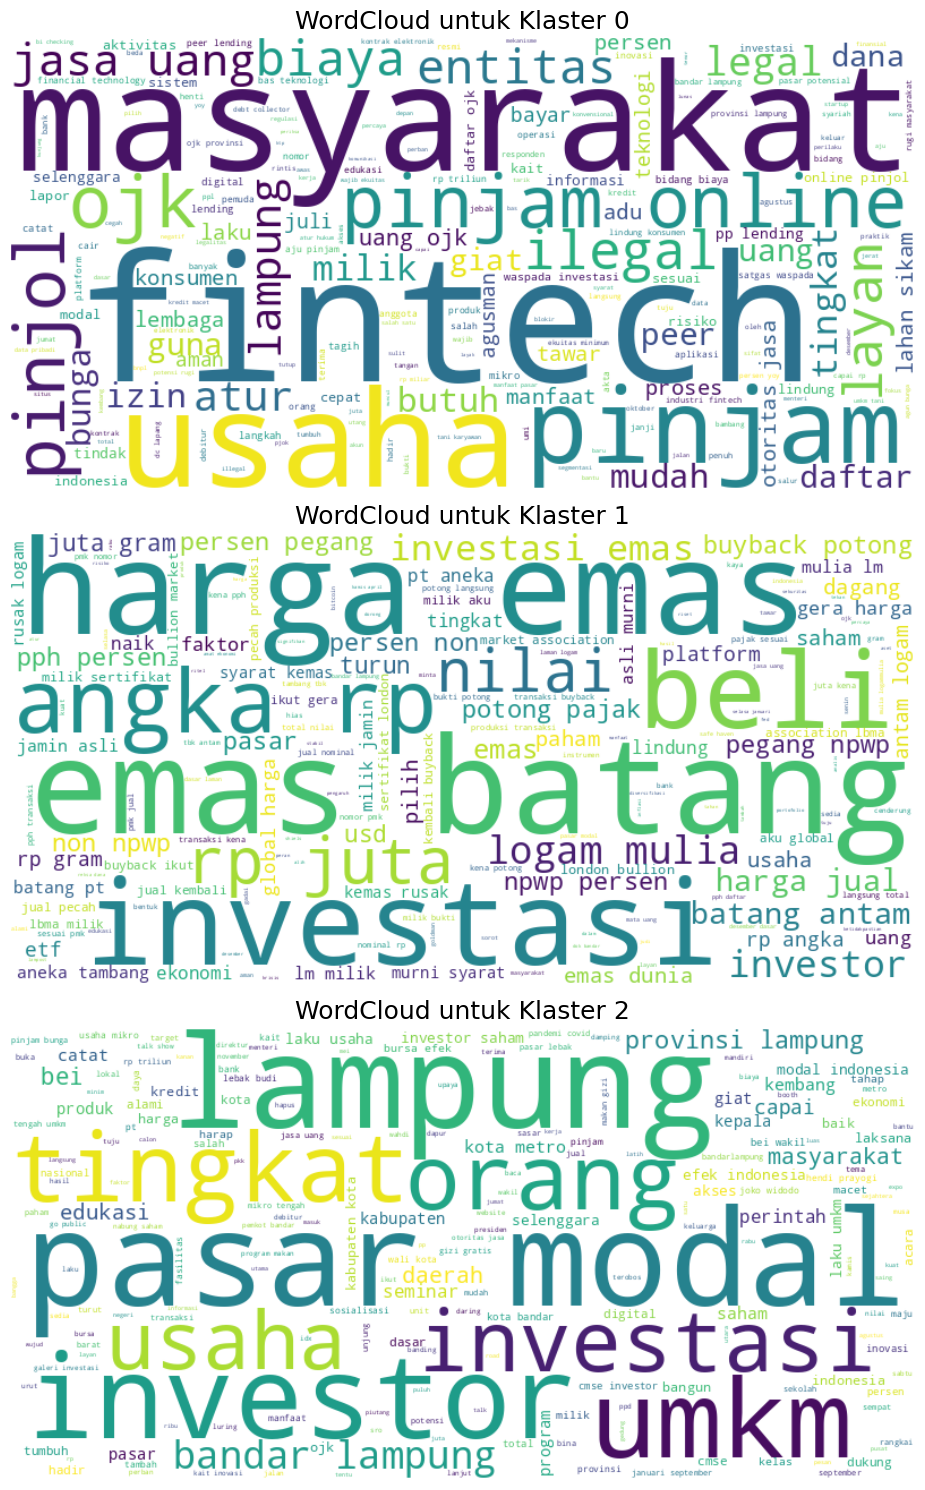

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

# Tambahkan label cluster ke DataFrame asli
df1["Cluster"] = final_labels

# Gabungkan semua teks berdasarkan cluster
cluster_texts = defaultdict(str)
for i, row in df1.iterrows():
    label = row["Cluster"]
    if label != -1:  # Abaikan outlier
        cluster_texts[label] += " " + row["stem_text"]

# Buat WordCloud untuk setiap cluster
plt.figure(figsize=(15, 5 * len(cluster_texts)))
for i, (cluster_label, text) in enumerate(cluster_texts.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.subplot(len(cluster_texts), 1, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud untuk Klaster {cluster_label}", fontsize=18)

plt.tight_layout()
plt.show()